No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


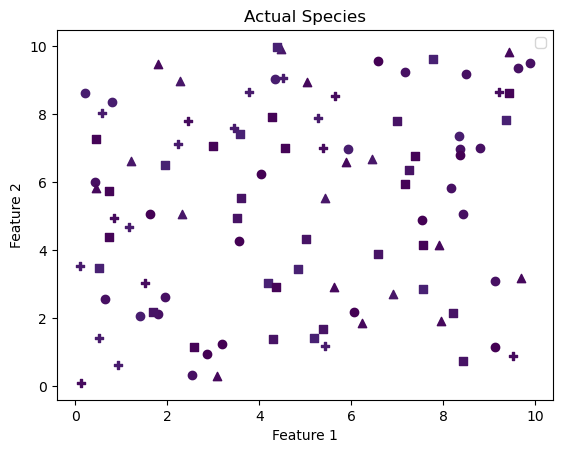

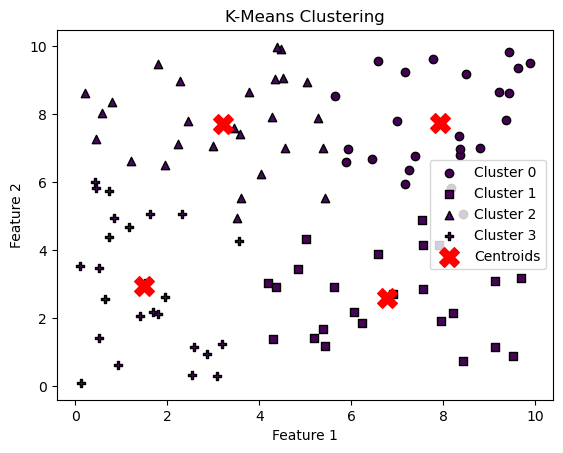

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def k_means_clustering(dataset, k, max_iterations=100):
    # Extract the Species column for future comparison
    actual_species = dataset.iloc[:, -1]
    
    # Remove the Species column before clustering
    dataset = dataset.iloc[:, :-1]
    
    # Initialize centroids randomly
    centroids = dataset.sample(k).values
    
    for _ in range(max_iterations):
        # Calculate distances from each point to centroids
        distances = np.linalg.norm(dataset.values[:, np.newaxis] - centroids, axis=2)

        # Assign each point to the cluster with the closest centroid
        cluster_assignments = np.argmin(distances, axis=1)

        # Update centroids based on the mean of points in each cluster
        new_centroids = np.array([dataset[cluster_assignments == i].mean(axis=0) for i in range(k)])

        # Check for convergence
        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    return centroids, cluster_assignments, actual_species

def plot_before_and_after_clustering(dataset, centroids, cluster_assignments, actual_species):
    markers = ['o', 's', '^', 'P']  # You can extend this list for more clusters
    colors = plt.cm.viridis(np.linspace(0, 1, len(set(actual_species))))

    # Plot before clustering (actual species)
    for species_label in set(actual_species):
        plt.scatter(dataset[actual_species == species_label].iloc[:, 0],
                    dataset[actual_species == species_label].iloc[:, 1],
                    marker=markers[int(species_label) % len(markers)],
                    color=colors[int(species_label) % len(colors)],)
                    #label=f'Actual Species {species_label}')

    plt.legend()
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Actual Species')
    plt.show()

    # Plot after clustering
    for cluster_label in set(cluster_assignments):
        plt.scatter(dataset.iloc[cluster_assignments == cluster_label, 0],
                    dataset.iloc[cluster_assignments == cluster_label, 1],
                    marker=markers[cluster_label % len(markers)],
                    color=colors[cluster_label % len(colors)],
                    edgecolors='black',
                    label=f'Cluster {cluster_label}')

    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
    plt.legend()

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('K-Means Clustering')
    plt.show()

# Example usage:
# Assuming 'dataset' is a Pandas DataFrame with features in columns 0 and 1
# and the last column 'Species' is the actual species labels
# k is the number of clusters
dataset = pd.DataFrame(np.random.rand(100, 3) * 10, columns=['Feature1', 'Feature2', 'Species'])
k = 4
centroids, cluster_assignments, actual_species = k_means_clustering(dataset, k)
plot_before_and_after_clustering(dataset.iloc[:, :-1], centroids, cluster_assignments, actual_species)
